Torchvision 中的各种经典网络结构以及训练好的模型，都放在了torchvision.models模块中

例如GoogLeNet

torchvision.models模块的使用，包括如何实例化一个网络与如何进行模型的微调。

Torchvision 中有趣的函数，make_grid 和 save_img


In [3]:
import torch
from torchvision import models
from torchvision.models import GoogLeNet_Weights

# 设置权重下载路径（相当于 download_root）
torch.hub.set_dir("./data/")

googlenet = models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

5.5%

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to ./data/checkpoints/googlenet-1378be20.pth


100.0%


In [7]:
# 模型微调
# 从0开始训练一个深度神经网络是非常耗时的，并且需要大量的数据，而且也容易过拟合。
# 迁移学习，可以用已经在 ImageNet 数据集上训练好的模型来达成你的目的。

# 提取分类层的输入参数
# fc 是 GoogLeNet 模型的最后一层全连接层
num_in_ftrs = googlenet.fc.in_features
print(num_in_ftrs)

# 提取输出类别数
num_out_ftrs = googlenet.fc.out_features
print(num_out_ftrs)

# 我们可以替换模型的最后一层全连接层
# 假设我们有 10 个类别
num_classes = 10
googlenet.fc = torch.nn.Linear(num_in_ftrs, num_classes)
print(googlenet.fc)

1024
10
Linear(in_features=1024, out_features=10, bias=True)


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

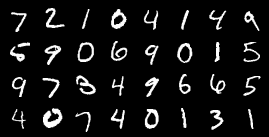

In [12]:
# 复习一下 torchvision.transforms 我们之前学过的图像预处理方法
# 我们可以拼接多个图像预处理方法， nrow 代表每行显示的图片数量， padding 代表图片之间的间距
# torchvision.utils.make_grid(tensor, nrow=8, padding=2)

import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载MNIST数据集
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = next(data_iter)
print(img_tensor)
print(label_tensor)
print(img_tensor.shape)
'''
输出：torch.Size([32, 1, 28, 28])
'''
# 将32张图片拼接在一个网格中
# batch size is 32, and nrow is 8, so there will be 4 rows
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=5)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

In [15]:
# 一般来说，在保存模型输出的图片时，需要将 Tensor 类型的数据转化为图片类型才能进行保存，过程比较繁琐。
# Torchvision 提供了 save_image 函数，能够直接将 Tensor 保存为图片，即使 Tensor 数据在 CUDA 上，也会自动移到 CPU 中进行保存。

from torchvision.utils import save_image
# 保存拼接好的图片
save_image(grid_tensor, './data/mnist_grid.png')

# save by tensor and  nrow and padding directly
save_image(img_tensor, './data/mnist_grid2.png', nrow=4, padding=5)